# **Capstone project: Providing data-driven suggestions for HR**

## Project Overview: Enhancing Employee Satisfaction and Retention at Salifort Motors

**Business Scenario:**

Salifort Motors' HR department is on a mission to enhance employee satisfaction and retention within the company. Armed with a wealth of employee data, they've turned to data analytics professionals for guidance. The fundamental question they pose is: "What factors are likely to drive employees to leave the company?"

**Project Objectives:**

In this project, our primary objectives are twofold:

1. **Data Analysis:** We will delve into the dataset collected by the HR department, seeking to uncover valuable insights that shed light on the factors influencing employee attrition. By thoroughly understanding the data, we can provide data-driven recommendations.

2. **Predictive Modeling:** To aid in the proactive management of employee retention, we will construct a predictive model. This model will assess the likelihood of an employee leaving the company. By doing so, we aim to identify key contributing factors that can be targeted for improvement.

**Why It Matters:**

Employee retention is a critical concern for organizations. The costs associated with recruitment, training, and onboarding of new employees are substantial. Hence, enhancing employee satisfaction and minimizing attrition can have a significant positive impact on the company's bottom line.

Throughout this project, we will employ data-driven approaches to help Salifort Motors make informed decisions that promote employee well-being and organizational success.


# **PACE stages**


## **PACE: Plan**

## Dataset Overview

In our analysis, we will be working with a dataset containing 14,999 records and 10 columns. These columns represent various attributes related to employee performance, satisfaction, and other pertinent factors. **It's important to note that this dataset is synthetic**, which means it has been artificially generated for the purpose of this project. As we proceed, this synthetic nature will become evident in our analysis.

**Dataset Variables:**

1. **Satisfaction Level:** Employee-reported job satisfaction level, ranging from 0 to 1.
2. **Last Evaluation:** The score received by employees in their most recent performance evaluation, also ranging from 0 to 1.
3. **Number of Projects:** The count of projects in which an employee actively participates.
4. **Average Monthly Hours:** The average number of hours worked by an employee per month.
5. **Time Spent with Company:** The duration (in years) an employee has been with the company.
6. **Work Accident:** A binary indicator (0 or 1) denoting whether the employee has experienced a work-related accident.
7. **Left:** A binary label (0 or 1) indicating whether the employee left the company.
8. **Promotion in Last 5 Years:** A binary indicator (0 or 1) signifying whether the employee received a promotion in the last five years.
9. **Department:** The department to which the employee belongs.
10. **Salary:** The salary level of the employee in U.S. dollars.

Our objective is to leverage this dataset to gain insights into employee satisfaction and identify factors that may influence their decision to leave the company. By analyzing this data, we aim to provide valuable recommendations for enhancing employee retention and satisfaction at Salifort Motors.


## Project Planning: Key Considerations

**Stakeholders:**
Our primary stakeholders for this project are the HR department at Salifort Motors. They seek data-driven insights to improve employee satisfaction and retention.

**Project Objectives:**
We aim to address the following:
- Understand factors influencing employee attrition.
- Build a predictive model for employee retention.
- Provide actionable recommendations to enhance retention.

**Initial Observations:**
Upon initial data exploration, we observe that:
- We have synthetic data, which is crucial to acknowledge.
- We possess a diverse set of employee-related variables.
- Attrition (employees leaving) is a focal point.

**Resources Used:**
- Dataset: [HR Analytics and Job Prediction](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv)
- Data analytics tools (e.g., Python, Jupyter Notebook)
- Data visualization libraries (e.g., Matplotlib, Seaborn)
- Machine learning libraries (e.g., Scikit-Learn)

**Ethical Considerations:**
While handling employee data, we must uphold privacy and data security standards. Anonymizing and protecting sensitive information is paramount. We'll also ensure that our analysis and recommendations are fair and do not discriminate against any group within the organization.


## Step 1. Imports




In [2]:
# Importing packages
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import pickle

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, classification_report, confusion_matrix, \
ConfusionMatrixDisplay , roc_auc_score, roc_curve

In [3]:
# Importing data
df0 = pd.read_csv("HR_capstone_dataset.csv")

df0

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

In [4]:
# Basic information about the data
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
# Descriptive statistics about the data
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Renaming columns

In [6]:
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [7]:
# Renaming columns as needed
df0.columns = ['satisfaction_level', 'last_evaluation', 'number_of_projects',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary']

df0

,satisfaction_level,last_evaluation,number_of_projects,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


### Checking missing values

In [8]:
df0.isna().sum()

satisfaction_level       0
last_evaluation          0
number_of_projects       0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Checking for duplicates

In [9]:
df0.duplicated().sum()

3008

In [10]:
# Inspecting duplicates
df0[df0.duplicated()].head()

,satisfaction_level,last_evaluation,number_of_projects,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


#### Assessing the Likelihood of Duplicate Entries

In our dataset, we've observed the presence of duplicate rows, specifically the first five occurrences that are repeated later in the dataframe. This prompts us to question the legitimacy of these entries – how plausible is it that two employees independently reported exactly the same responses for every column?

Upon consideration, it appears highly unlikely that such duplicates are legitimate. Our dataset contains several continuous variables across ten columns, making the probability of two employees having identical responses across all attributes exceedingly low.

Given this assessment, we will proceed by removing these duplicate entries from our dataset. This step is essential to ensure the integrity and accuracy of our analysis, as these entries may introduce bias and distort our findings.


In [11]:
# Dropping duplicates
df = df0.drop_duplicates(keep='first')

df.reset_index(drop=True)

,satisfaction_level,last_evaluation,number_of_projects,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
11986,0.90,0.55,3,259,10,1,0,1,management,high
11987,0.74,0.95,5,266,10,0,0,1,management,high
11988,0.85,0.54,3,185,10,0,0,1,management,high
11989,0.33,0.65,3,172,10,0,0,1,marketing,high


### Checking for outliers

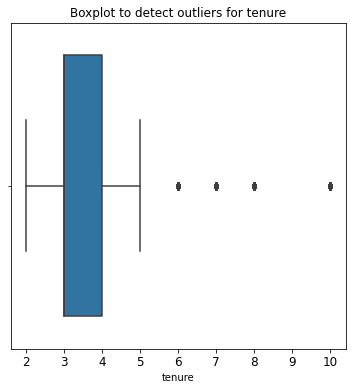

In [12]:
# Creating boxplot to visualize distribution of `tenure` and detect any outliers
plt.figure(figsize=(6,6))
plt.title('Boxplot to detect outliers for tenure', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=df['tenure'])
plt.show()

In [13]:
# Number of rows containing outliers
q1 = df.tenure.quantile(0.25)
q3 = df.tenure.quantile(0.75)

iqr = q3 - q1

upper_limit = q3 + 1.5 * iqr
upper_limit


5.5

In [14]:
print('Number of rows in the data containing outliers in tenure: ', len(df[df.tenure > 5.5]))

Number of rows in the data containing outliers in tenure:  824


#### Handling Outliers: Model Sensitivity

As we advance to the model-building stage, it's crucial to be mindful of the impact of outliers on our modeling process. Different types of models exhibit varying degrees of sensitivity to outliers. Consequently, our decision to address outliers should be influenced by the choice of model we opt for.

We will carefully evaluate the outlier-handling strategy in light of our chosen modeling approach. This thoughtful consideration ensures that our model's performance is robust and not unduly influenced by extreme data points.


# PACE: Analyze Stage


## Preparing for EDA: Key Considerations

**1. Variable Relationships:** Have we explored how variables in our dataset are related to one another? 

**2. Data Distributions:** What insights have we gained about the data's distribution, central tendencies, and potential outliers?

**3. Data Transformations:** Why have we chosen specific data transformations, and how do they enhance our analysis?

**4. EDA Purposes:** What are the primary goals of conducting EDA before constructing a predictive model?

**5. Resources Utilized:** What tools and datasets are we using for our EDA?

**6. Ethical Considerations:** Are we maintaining data privacy and ethical standards while exploring and analyzing the data?

## Step 2. Data Exploration (Continuing with EDA)



In [15]:
# Numbers of people who left vs. stayed
print(df.left.value_counts())
print()

print(df.left.value_counts(normalize=True))

0    10000
1     1991
Name: left, dtype: int64

0    0.833959
1    0.166041
Name: left, dtype: float64


### Data visualizations

In [16]:
df.head()

,satisfaction_level,last_evaluation,number_of_projects,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Establishing a Baseline for Usual Working Hours

To provide context for our analysis, we've calculated a baseline for typical working hours. Assuming a standard 40-hour workweek and accounting for two weeks of vacation per year, we arrive at an average monthly working hours estimate of approximately 166.67 hours, i.e  `50 weeks * 40 hours per week / 12 months = 166.67 hours per month`

This baseline serves as a reference point for evaluating whether employees are working significantly more than the standard, a crucial factor as we explore variable relationships and their potential influence on employee satisfaction and retention.


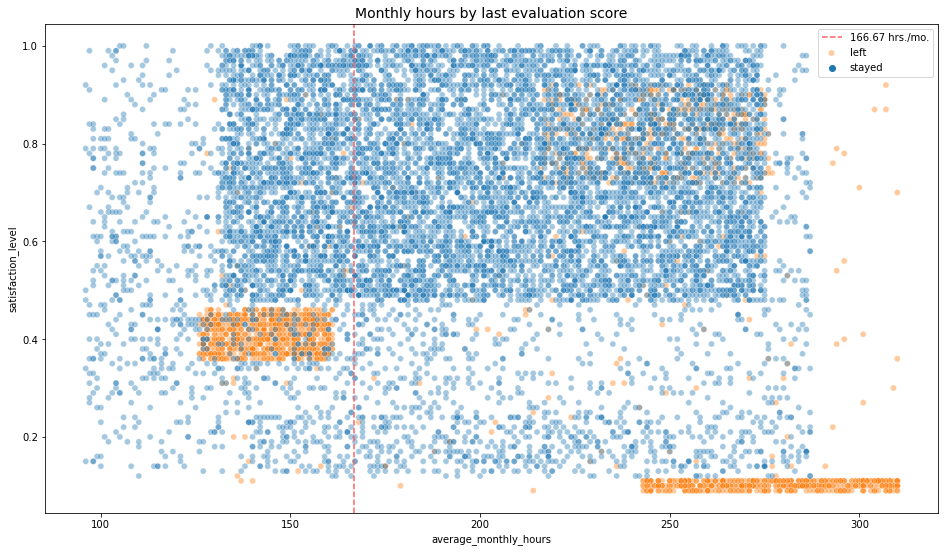

In [17]:
# Visualizing employees average monthly hours and satisfaction level
plt.figure(figsize=(16, 9))
sns.scatterplot(data=df, x='average_monthly_hours', y='satisfaction_level', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', label='166.67 hrs./mo.', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly hours by last evaluation score', fontsize='14');

**Scatterplot Insights:**

The scatterplot reveals distinct employee groups:
- A sizable group worked extensive hours (240-315 per month) with low satisfaction levels, possibly indicating dissatisfaction due to long hours.
- Another group, with more standard working hours, left with moderate satisfaction (around 0.4). They might have felt pressured to work more.
- A third group worked moderate hours (210-280) with satisfaction levels ranging from 0.7 to 0.9.

Notably, the peculiar shape of these distributions hints at potential data manipulation or synthetic data creation.


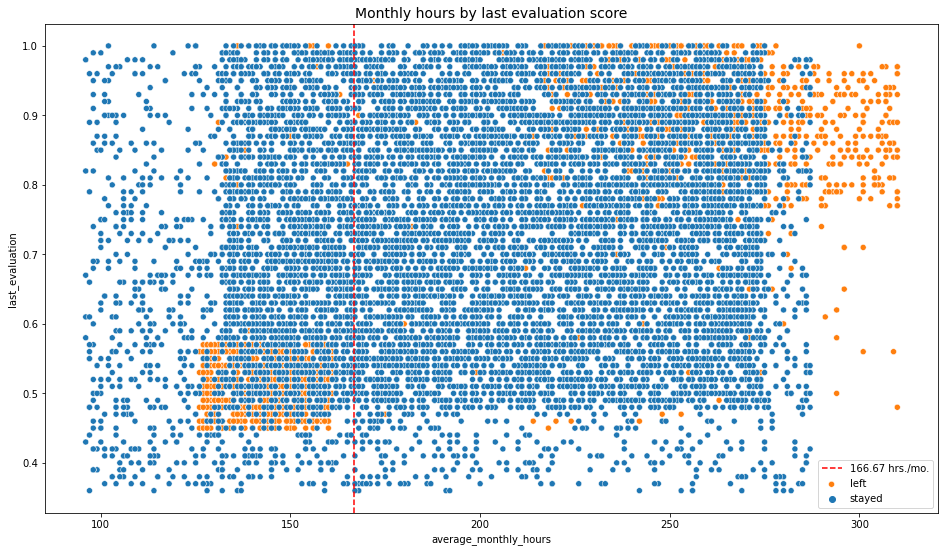

In [18]:
# Visualizing employees last evaluation score and average monthly hours
plt.figure(figsize=(16, 9))
sns.scatterplot(x=df.average_monthly_hours, y=df.last_evaluation, hue=df.left)
plt.axvline(x=166.67, color='r', label='166.67 hrs./mo.', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly hours by last evaluation score', fontsize='14');


The following observations can be made from the scatterplot above:
- The scatterplot indicates two groups of employees who left: overworked employees who performed very well and employees who worked slightly under the nominal monthly average of 166.67 hours with lower evaluation scores. 
- There seems to be a correlation between hours worked and evaluation score. 
- There isn't a high percentage of employees in the upper left quadrant of this plot; but working long hours doesn't guarantee a good evaluation score.
- Most of the employees in this company work well over 167 hours per month.

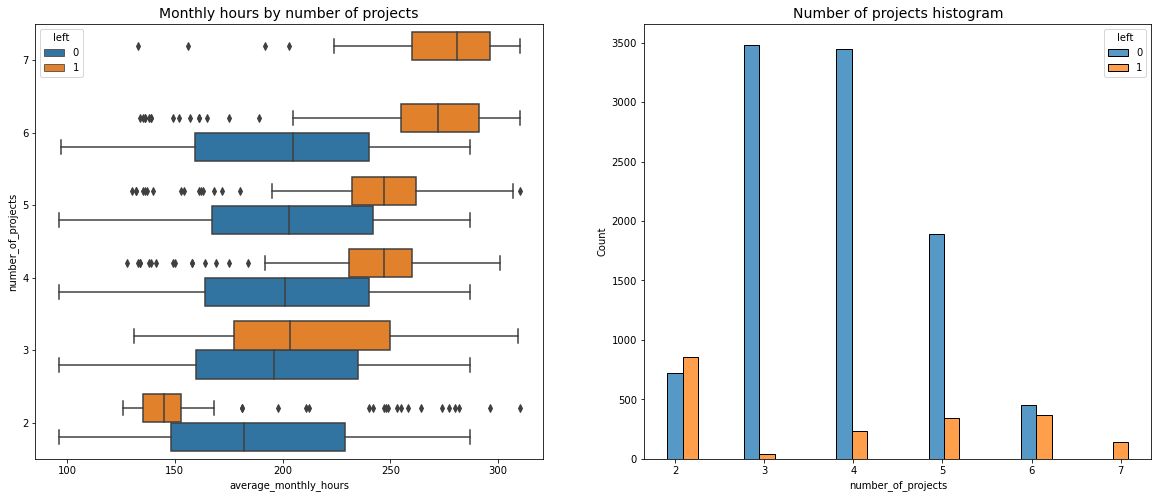

In [19]:
# Analyzing Project Count and Working Hours
fig, ax = plt.subplots(1, 2, figsize = (20,8))

# Boxplot showing `average_monthly_hours` distributions for `number_project`, comparing employees who stayed v/s those who left
#left
sns.boxplot(data=df, x='average_monthly_hours', y='number_of_projects', hue='left', orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Monthly hours by number of projects', fontsize='14')

# Histogram showing distribution of `number_project`, comparing employees who stayed versus those who left
tenure_stay = df[df['left']==0]['number_of_projects']
tenure_left = df[df['left']==1]['number_of_projects']
sns.histplot(data=df, x='number_of_projects', hue='left', multiple='dodge', shrink=2, ax=ax[1])
ax[1].set_title('Number of projects histogram', fontsize='14')

plt.show()

Our analysis of the relationship between the number of projects and average monthly hours reveals several noteworthy insights:

1. **Variability in Working Hours for Employees Who Left:**
   - We observe two distinct groups among employees who left the company:
     - (A) Employees who worked considerably fewer hours than their peers with the same number of projects, possibly indicating termination or impending resignation.
     - (B) Employees who put in significantly more hours before quitting, suggesting substantial project contributions.

2. **High Working Hours for Seven-Project Employees:**
   - Employees handling seven projects left the company. Those with six projects also logged extensive hours, surpassing other groups. This indicates a potential connection between high workload and attrition.

3. **Optimal Project Count for Retention:**
   - Employees working on three to four projects displayed a substantially lower left-to-stayed ratio, implying that maintaining this project count range could be conducive to higher employee retention.

These findings shed light on the complex relationship between the number of projects, working hours, and employee attrition, offering valuable insights for HR and management considerations.

In [20]:
# All employees working on 7 projects ended up leaving
df[df.number_of_projects == 7]['left'].value_counts()

1    145
Name: left, dtype: int64

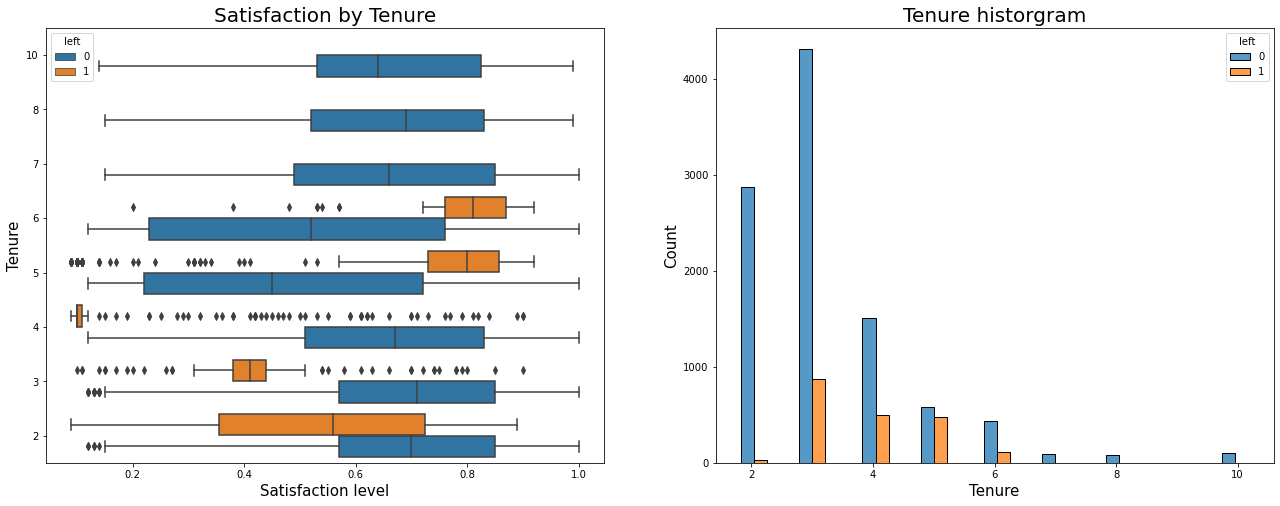

In [21]:
# Visualizing satisfaction level by tenure

fig, ax = plt.subplots(1,2, figsize=(22,8))

sns.boxplot(data=df, x='satisfaction_level', y='tenure', ax=ax[0], orient='h', hue='left')
ax[0].invert_yaxis()
ax[0].set_title('Satisfaction by Tenure', fontsize='20')
ax[0].set_xlabel('Satisfaction level', fontsize='15')
ax[0].set_ylabel('Tenure', fontsize='15')

sns.histplot(data=df, x='tenure', hue='left',multiple='dodge',shrink=5, ax=ax[1])
ax[1].set_title('Tenure historgram', fontsize='20')
ax[1].set_xlabel('Tenure', fontsize='15')
ax[1].set_ylabel('Count', fontsize='15')


plt.show()

**Key Insights from Satisfaction Level vs. Tenure Analysis:**

- Departing employees can be broadly categorized into two groups: those with shorter tenures and lower satisfaction and those with medium-length tenures and very high satisfaction.
- Notably, employees with a four-year tenure who left exhibit an unusually low satisfaction level. Investigating potential policy changes around the four-year mark could provide valuable insights.
- Longer-tenured employees, especially those with the longest tenure, chose to stay. Their satisfaction levels align with those of newer employees who remained.
- The histogram highlights the relative scarcity of longer-tenured employees, possibly indicating that they occupy higher-ranking and higher-paid positions within the company.


In [22]:
# Calculating mean and median satisfaction level of employees who left and stayed

df.groupby(['left'])['satisfaction_level'].agg([np.mean,np.median])

,mean,median
left,,
0,0.667365,0.69
1,0.440271,0.41


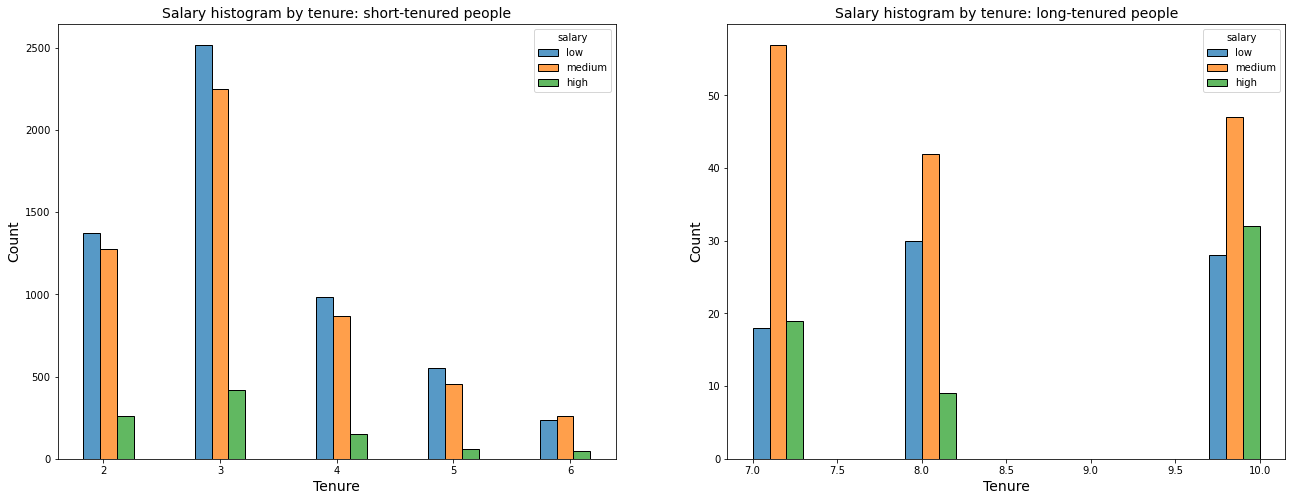

In [23]:
#Visualizing salary levels for different tenures
fig, ax = plt.subplots(1,2, figsize=(22,8))

short_tenure = df[df.tenure < 7]
long_tenure =  df[df.tenure >= 7]

#Short tenure
sns.histplot(data=short_tenure, x='tenure', multiple='dodge', ax=ax[0], hue='salary', hue_order=['low', 'medium', 'high'], 
             shrink=5)
ax[0].set_xlabel('Tenure', fontsize='14')
ax[0].set_ylabel('Count', fontsize='14')
ax[0].set_title('Salary histogram by tenure: short-tenured people', fontsize='14')


#Long tenure
sns.histplot(data=long_tenure, x='tenure', multiple='dodge', ax=ax[1], hue='salary', hue_order=['low', 'medium', 'high'], 
             shrink=1)
ax[1].set_xlabel('Tenure', fontsize='14')
ax[1].set_ylabel('Count', fontsize='14')
ax[1].set_title('Salary histogram by tenure: long-tenured people', fontsize='14');


**Analysis of Tenure and Salary:**

Contrary to expectations, the visualizations suggest that longer-tenured employees were not disproportionately represented among higher-paid positions within the company. This finding challenges the assumption that extended tenure correlates directly with higher salaries.


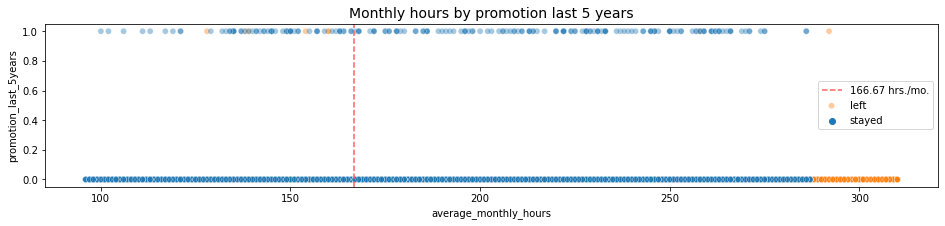

In [24]:
#Visualizing average monthly hours and promotion in last 5 years

plt.figure(figsize=(16, 3))
sns.scatterplot(data=df, x='average_monthly_hours', y='promotion_last_5years', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly hours by promotion last 5 years', fontsize='14');

**Promotion and Working Hours Analysis:**

The visualizations reveal the following patterns:

- A minimal number of employees who were promoted in the last five years chose to leave the company, suggesting that promotions may have a positive impact on retention.
- Conversely, very few employees who logged the most working hours received promotions, indicating a potential inverse relationship between long hours and promotions.
- Strikingly, all departing employees were those working the longest hours, pointing to a correlation between excessive working hours and attrition.


In [25]:
df["department"].value_counts()

sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: department, dtype: int64

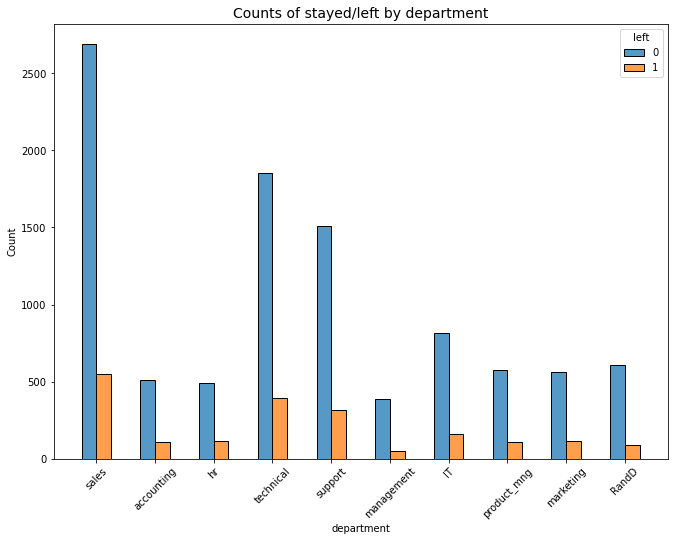

In [26]:
# Visualizing how the employees who left are distributed across departments

plt.figure(figsize=(11,8))
sns.histplot(data=df, x='department', hue='left', discrete=1, 
             hue_order=[0, 1], multiple='dodge', shrink=.5)
plt.xticks(rotation='45')
plt.title('Counts of stayed/left by department', fontsize=14);

**Departmental Attrition Analysis:**

Our analysis does not reveal any significant differences in the proportion of employees who left compared to those who stayed across various departments. This suggests a relatively uniform attrition rate across different departments within the company.

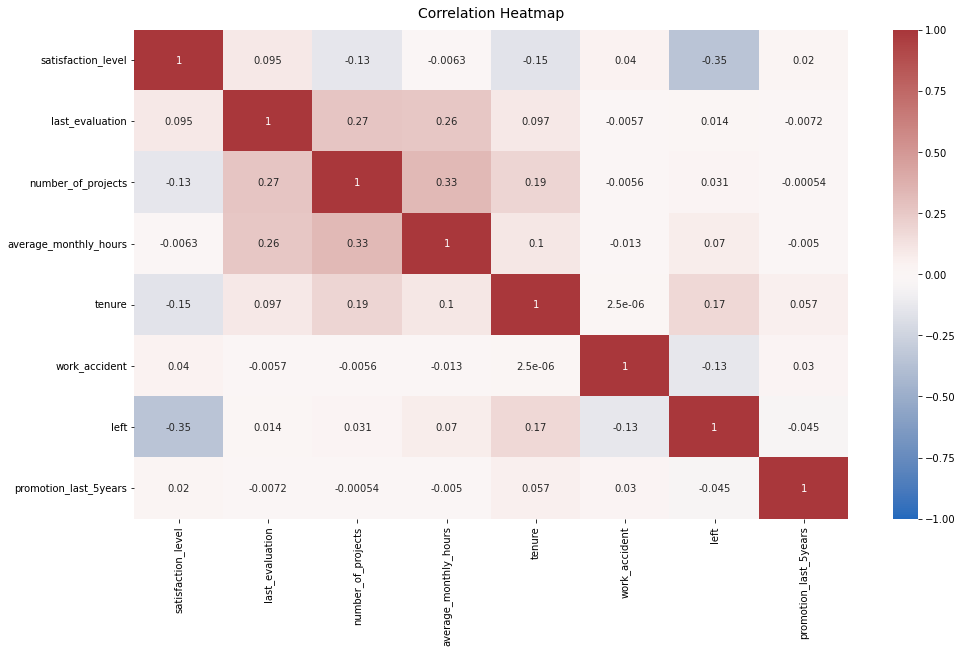

In [27]:
# Visualizing correation btw variables in the data

plt.figure(figsize=(16, 9))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);

**Correlation Heatmap Insights:**

The correlation heatmap affirms the following associations:
- There is a positive correlation between the number of projects, monthly hours, and evaluation scores, indicating that employees working on more projects tend to work longer hours and receive higher evaluation scores.
- Notably, the decision to leave the company shows a negative correlation with employee satisfaction level. This implies that as satisfaction decreases, the likelihood of leaving increases, reinforcing the significance of satisfaction in employee retention.


In [28]:
# Encoding ordinal variable 'salary'. Alternative could be to .map() function
df_enc = df.copy()

df_enc.salary = (
                 df_enc.salary.astype('category')
                 .cat.set_categories(['low', 'medium','high'])
                 .cat.codes
                )

df_enc

,satisfaction_level,last_evaluation,number_of_projects,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,0
1,0.80,0.86,5,262,6,0,1,0,sales,1
2,0.11,0.88,7,272,4,0,1,0,sales,1
3,0.72,0.87,5,223,5,0,1,0,sales,0
4,0.37,0.52,2,159,3,0,1,0,sales,0
...,...,...,...,...,...,...,...,...,...,...
11995,0.90,0.55,3,259,10,1,0,1,management,2
11996,0.74,0.95,5,266,10,0,0,1,management,2
11997,0.85,0.54,3,185,10,0,0,1,management,2
11998,0.33,0.65,3,172,10,0,0,1,marketing,2


In [29]:
# OneHotEncoding remaining categorical columns i.e departments for now in our case.
df_enc = pd.get_dummies(df_enc, drop_first=False)

df_enc.head()

,satisfaction_level,last_evaluation,number_of_projects,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


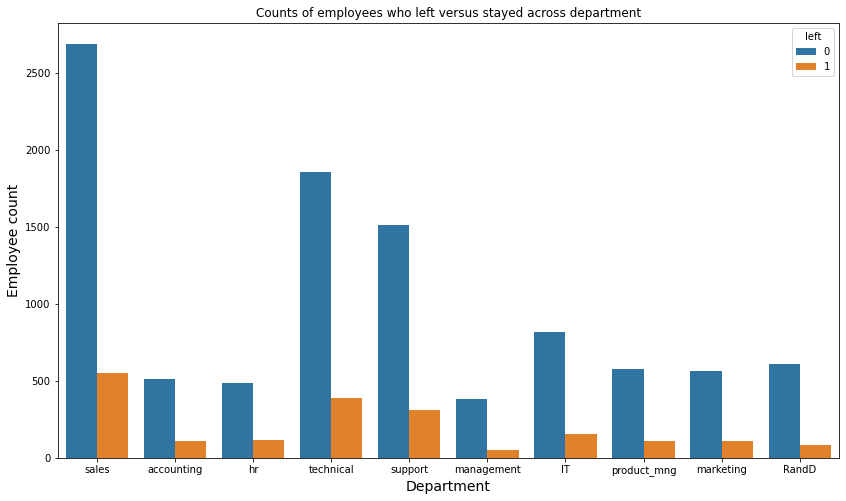

In [30]:
# Visualizing how many employees left across departments

plt.figure(figsize=(14,8))

sns.countplot(data=df, x='department',hue='left', dodge=True)
plt.title('Counts of employees who left versus stayed across department')
plt.ylabel('Employee count', fontsize=14)
plt.xlabel('Department', fontsize=14)
plt.show()


## **Key EDA Insights:**

The comprehensive analysis of various variables paints a vivid picture of factors contributing to employee attrition:

- **Management and Working Conditions:** Leaving the company appears associated with factors like extended working hours, juggling numerous projects, and generally lower satisfaction levels. This suggests that management practices and working conditions may be influential in employee decisions.

- **Burnout Risk:** There's a notable group of employees who likely experience burnout due to long hours, a lack of promotions, and less favorable evaluation scores. This raises concerns about employee well-being and work-life balance.

- **Tenure Impact:** An intriguing finding is that employees who have spent more than six years with the company tend to stay. This underscores the value of longer-tenured employees and their potential loyalty.

These insights provide a valuable foundation for understanding the dynamics of employee satisfaction, retention, and potential areas for improvement within the organization.


# PACE: Construct Stage

## Construct Stage Overview

In the "Construct" stage, we will:

- **Choose Models**: Determine which models are most appropriate for our predictive task.

- **Build Models**: Construct logistic regression, decision trees, and random forest models.

- **Assumption Check**: Confirm model assumptions, especially for logistic regression.

- **Evaluate Models**: Assess how well each model fits the data, using relevant evaluation metrics.

This stage sets the foundation for selecting the best-performing model for our predictive analysis.


**Objective:** Develop a model to predict employee attrition for better retention.

**Prediction Task:** Binary classification: predict if an employee will leave (1) or stay (0).

**Model Choices:**
1. **Logistic Regression**: Simple and interpretable.
2. **Tree-Based Models**: Handle complex relationships effectively.

**Workflow:**
1. Model building: Logistic regression and tree-based models.
2. Model selection: Choose the best-performing model.
3. Insights: Understand attrition drivers for proactive retention efforts.



### Modeling Approach A: Logistic Regression Model

This approach covers implementation of Logistic Regression.

**Note** that binomial logistic regression suits the task because it involves binary classification.

### Assumptions of Logistic Regression

1. **Linearity**: The relationship between predictor variables and the log-odds of the target is assumed to be linear.

2. **Independence of Errors**: Observations are assumed to be independent of each other.

3. **No Multicollinearity**: Predictor variables should not be highly correlated with each other.

4. **Large Sample Size**: A relatively large sample size is recommended for reliable parameter estimates.

5. **Binary Outcome**: The dependent variable is binary or dichotomous.

6. **No Outliers**: The absence of significant outliers that could unduly influence the model.

These assumptions help ensure the reliability and validity of the logistic regression model.


## Removing outliers

Since logistic regression is sensitive to outliers we are removing outliers from the `tenure` column identified earlier.

In [31]:
# Upper limit identified earlier for tenure was 5.5 years.

df_final = df_enc[df_enc.tenure < upper_limit]

In [32]:
df_final.tenure.unique()

array([3, 4, 5, 2])

In [33]:
# Isolating the target variable and features
y = df_final['left']

X = df_final.drop(columns='left', axis=1)

In [34]:
X

,satisfaction_level,last_evaluation,number_of_projects,average_monthly_hours,tenure,work_accident,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11985,0.72,0.64,4,192,3,0,0,1,0,0,0,0,0,0,0,1,0,0
11986,0.48,0.50,5,142,4,0,0,1,1,0,0,0,0,0,0,0,0,0
11987,0.19,0.79,4,229,4,0,0,1,0,0,0,0,0,0,1,0,0,0
11992,0.62,0.85,3,237,3,1,0,1,1,0,0,0,0,0,0,0,0,0


In [35]:
y

0        1
2        1
3        1
4        1
5        1
        ..
11985    0
11986    0
11987    0
11992    0
11999    0
Name: left, Length: 11167, dtype: int64

In [36]:
# Checking class imabalance

y.value_counts(normalize=True)

0    0.831468
1    0.168532
Name: left, dtype: float64

In [37]:
# Splitting data into training and test data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

In [38]:
# Instantiating classifier and fitting to training data

log_clf = LogisticRegression(max_iter=500, random_state=42).fit(X_train, y_train)

In [39]:
# Predicting on test data

preds = log_clf.predict(X_test)

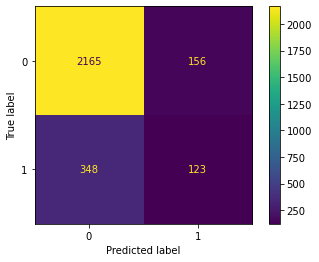

In [40]:
# Visualizing confusion matrix to understand the performance of the model

cm = confusion_matrix(y_test, preds, labels=log_clf.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_clf.classes_)

disp.plot(values_format='')

In [41]:
target_labels = ['stayed', 'left']
print(classification_report(y_test, preds, target_names=target_labels))

              precision    recall  f1-score   support

      stayed       0.86      0.93      0.90      2321
        left       0.44      0.26      0.33       471

    accuracy                           0.82      2792
   macro avg       0.65      0.60      0.61      2792
weighted avg       0.79      0.82      0.80      2792



### Assessing Model Performance

- **Precision:** Our model correctly identifies attrition cases 44% of the time.
- **Recall:** The model effectively captures 26% of actual attrition cases.
- **F1-Score:** It provides a balanced measure of model performance, with a score of 33%.

**Important Note:** Our dataset exhibits a significant class imbalance, with a higher representation of employees who have not left. Given this imbalance, we should exercise caution when interpreting weighted averages, as they may not accurately reflect our model's effectiveness.

Despite the need for improvement, these metrics provide a starting point for proactive strategies to identify and support employees at risk of attrition. Our overarching objective is to reduce turnover and enhance the stability of our organization.


### Modeling Approach B: Tree based models

Switching to tree-based models eliminates the need to remove outliers. These models, like Random Forest and Decision Trees, are robust to outliers due to their hierarchical structure, making them resilient to extreme values in the data. This means we can use our dataset as is `df_enc`, without the removal of outliers, to build our models.

### 1. Decision Tree model

In [42]:
# Separating target variable and features

y = df_enc['left']

X = df_enc.drop('left', axis=1)

In [43]:
X.head()

,satisfaction_level,last_evaluation,number_of_projects,average_monthly_hours,tenure,work_accident,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,0,0,1,0,0


In [44]:
# Splitting data into training and test data

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, stratify=y, random_state=42)

In [45]:
# Instantiating classifier and setting up the gridsearch

tree = DecisionTreeClassifier(random_state=42)

cv_params = {'max_depth': [2,5,8, None],
            'min_samples_split': [2,5,7],
            'min_samples_leaf': [2,5,7]}

scoring = {'precision','recall','accuracy', 'f1', 'roc_auc'}

tree1 = GridSearchCV(tree, cv_params, cv=5, scoring=scoring , refit='roc_auc')

### ROC-AUC for Imbalanced Datasets

**Why ROC-AUC Matters:**
ROC-AUC is essential for imbalanced datasets because it handles class imbalance, evaluates model discriminative power across thresholds, enables model comparison, and remains flexible and threshold-agnostic.


In [49]:
# Fitting the model to training data

tree1.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=42,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [2, 5, 8, None],
                         

In [50]:
# Best roc_auc score of model

tree1.best_score_

0.9732359774939582

In [51]:
# Best parameters of gridsearch

tree1.best_params_

{'max_depth': 5, 'min_samples_leaf': 7, 'min_samples_split': 2}

In [52]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
        model_name (string): what we want the model to be called in the output table
        model_object: a fit GridSearchCV object
        metric (string): precision, recall, f1, accuracy, or auc
  
    Returns a pandas df with the F1, recall, precision, accuracy, and auc scores
    for the model with the best mean 'metric' score across all validation folds.  
    '''

    # Creating a dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'auc': 'mean_test_roc_auc',
                   'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy'
                  }
    
    cv_results = pd.DataFrame(model_object.cv_results_) 
    
    
    best_idx_row = cv_results.iloc[cv_results[metric_dict[metric]].idxmax()]
    
    precision = best_idx_row.mean_test_precision
    recall = best_idx_row.mean_test_recall
    accuracy = best_idx_row.mean_test_accuracy
    f1 = best_idx_row.mean_test_f1
    roc_auc = best_idx_row.mean_test_roc_auc
    
    
    table = pd.DataFrame({
                                'Model Name': [model_name],
                                'Precision': [precision],
                                'Recall': [recall],
                                'Accuracy': [accuracy],
                                'F1': [f1],
                                'ROC_AUC': [roc_auc]
                                })
    
    return table

In [53]:
results_table = make_results('Decision Tree', tree1, 'auc')
results_table

,Model Name,Precision,Recall,Accuracy,F1,ROC_AUC
0,Decision Tree,0.94754,0.906218,0.976092,0.926358,0.973236


### Analysis of results

The simple Decision Tree model achieved strong performance with high accuracy (97.6%) and a good balance between precision and recall. The ROC-AUC score of 0.9732 indicates excellent discriminative power.

### 2. Random forest model 

In [54]:
# Instantiating classifier and setting up gridsearch

rf = RandomForestClassifier(random_state=42)

cv_params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [100,300, 500]
            }

scoring = {'precision','recall','accuracy', 'f1', 'roc_auc'}

rf1 = GridSearchCV(rf, cv_params, scoring=scoring, cv=5, refit='roc_auc')

In [55]:
%%time

rf1_model = rf1.fit(X_train, y_train)

CPU times: user 13min 24s, sys: 11 s, total: 13min 35s
Wall time: 13min 35s


In [53]:
# with open('rf1_model.sav', 'wb') as file:
#     pickle.dump(rf1_model, file)

In [54]:
# with open('rf1_model.sav', 'rb') as file:
#     loaded_model = pickle.load(file)

In [55]:
# rf1 = loaded_model

In [56]:
# Best parameters identified by gridsearch

rf1.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [57]:
# Best roc_auc score of model

rf1.best_score_

0.9817627737499345

In [58]:
# Updating results table

rf1_results = make_results('RF1', rf1, 'auc')

results_table = pd.concat([results_table, rf1_results],axis=0, ignore_index=True)
results_table

,Model Name,Precision,Recall,Accuracy,F1,ROC_AUC
0,Decision Tree,0.947540,0.906218,0.976092,0.926358,0.973236
1,RF1,0.948837,0.918276,0.978205,0.933274,0.981763


### Analysis of results


The Random Forest model, using girdsearch on training data, demonstrates impressive performance with high accuracy (97.8%) and a strong ROC-AUC score of 0.9818, indicating excellent overall model quality.

In [59]:
def get_scores(model_name:str, model, X_test_data, y_test_data):
    '''
    Generate a table of test scores.

    In: 
        model_name (string):  How we want our model to be named in the output table
        model:                A fit GridSearchCV object
        X_test_data:          X_test data
        y_test_data:          y_test data

    Out: pandas df of precision, recall, f1, accuracy, and AUC scores for our model on test data
    '''

    preds = model.best_estimator_.predict(X_test_data)

    auc = roc_auc_score(y_test_data, preds)
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'Model Name': [model_name],
                          'Precision': [precision], 
                          'Recall': [recall],
                          'F1': [f1],
                          'Accuracy': [accuracy],
                          'ROC_AUC': [auc]
                         })
  
    return table

In [60]:
rf1_test_results = get_scores('RF1 Test', rf1, X_test, y_test)

In [61]:
results_table = pd.concat([results_table, rf1_test_results],axis=0, ignore_index=True)
results_table

,Model Name,Precision,Recall,Accuracy,F1,ROC_AUC
0,Decision Tree,0.947540,0.906218,0.976092,0.926358,0.973236
1,RF1,0.948837,0.918276,0.978205,0.933274,0.981763
2,RF1 Test,0.950617,0.927711,0.979987,0.939024,0.959055


### Analysis of results


On the test data, the Random Forest model (RF1) maintains its strong performance, with an accuracy of 98.0% and a good balance between precision and recall. The ROC-AUC score of 0.9591 indicates robust model discriminative power on unseen data.

These results showcase the effectiveness of the Decision Tree and Random Forest models, with the latter achieving the highest performance across various metrics. The choice of ROC-AUC as the refit method appears to have yielded models with excellent discriminative power.

## Next Steps: Feature Engineering

In the pursuit of model accuracy and reliability, it's imperative to be vigilant about potential data leakage, which can result in unrealistically high evaluation scores and non-reproducible model performance in real-world applications. Here, we highlight key data leakage scenarios and outline our proactive feature engineering steps.

**Data Leakage Scenarios:**

1. **Satisfaction Data:** It's likely that not all employees have reported their satisfaction levels in a real world scenario or it's data that we would not expect to have when the model is actually deployed.. Relying heavily on this variable could introduce bias and reduce model reliability.

2. **"Average Monthly Hours" as a source of Leakage:** The "average_monthly_hours" column could inadvertently lead to data leakage. When employees have already decided to leave or have been identified for termination, their working hours may change, potentially skewing model predictions.

### **Feature Engineering Solutions:**

To bolster the accuracy and robustness of our models, we're implementing the following feature engineering strategies:

1. **Exclusion of "Satisfaction Level":** We're considering removing the "satisfaction_level" variable from our model inputs. This cautious step minimizes the influence of potentially incomplete satisfaction data on our predictions.

2. **Introduction of "Overworked" Feature:** To better capture employee behavior, we're introducing a binary feature named "overworked." This feature will help us identify employees who may be overworked, taking into account variations in their working hours. It proves especially valuable when dealing with cases where employees have already made the decision to leave or have been earmarked for termination.

By embracing these feature engineering techniques, we aim to deliver models that are not only more accurate but also dependable in real-world scenarios. This approach underscores our commitment to providing actionable insights while safeguarding data integrity and mitigating the risk of data leakage.



In [62]:
df2 = df_enc.drop('satisfaction_level', axis=1)

df2.head()

,last_evaluation,number_of_projects,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [63]:
# Creating a new column 'overworked'. For now it is same as avg monthly hours

df2['overworked'] = df2['average_monthly_hours']

print('Max hours:', df2['overworked'].max())
print('Min hours:', df2['overworked'].min())

Max hours: 310
Min hours: 96


**Assumption regarding new feature**

166.67 is approximately the average number of monthly hours for someone who works 50 weeks per year, 5 days per week, 8 hours per day. 

We could define being overworked as working more than 175 hours per month on average. 

In [64]:
df2['overworked'] = (df2.overworked > 175).astype(int)

In [65]:
df2

,last_evaluation,number_of_projects,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,overworked
0,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1
2,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1
3,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1
4,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,0.55,3,259,10,1,0,1,2,0,0,0,0,1,0,0,0,0,0,1
11996,0.95,5,266,10,0,0,1,2,0,0,0,0,1,0,0,0,0,0,1
11997,0.54,3,185,10,0,0,1,2,0,0,0,0,1,0,0,0,0,0,1
11998,0.65,3,172,10,0,0,1,2,0,0,0,0,0,1,0,0,0,0,0


In [66]:
# Dropping average monthly hours column since new created a new column based on it.

df2.drop('average_monthly_hours', axis=1, inplace=True)

In [67]:
df2.head()

,last_evaluation,number_of_projects,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,overworked
0,0.53,2,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0.86,5,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1
2,0.88,7,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1
3,0.87,5,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1
4,0.52,2,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0


## Decision Tree 2 

In [68]:
# Defining target variable and features

X = df2.drop('left', axis=1)

y = df2.left

In [69]:
# Splitting data into training and testing set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)

In [70]:
# Instantiating model
tree = DecisionTreeClassifier(random_state=0)

# Dictionary of hyperparameters to search over
cv_params = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]
             }

# Scoring metrics dictionary
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

tree2 = GridSearchCV(tree, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [71]:
%%time
tree2.fit(X_train, y_train)

CPU times: user 2.23 s, sys: 6.71 ms, total: 2.24 s
Wall time: 2.24 s


GridSearchCV(cv=4, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                

In [72]:
# Best parameters of gridsearch

tree2.best_params_

{'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 6}

In [73]:
# Best roc_auc score

tree2.best_score_

0.9586752505340426

In [74]:
tree2_cv_results = make_results('Decision Tree 2', tree2, 'auc')

In [75]:
results_table = pd.concat([results_table, tree2_cv_results], ignore_index=True, axis=0)
results_table

,Model Name,Precision,Recall,Accuracy,F1,ROC_AUC
0,Decision Tree,0.947540,0.906218,0.976092,0.926358,0.973236
1,RF1,0.948837,0.918276,0.978205,0.933274,0.981763
2,RF1 Test,0.950617,0.927711,0.979987,0.939024,0.959055
3,Decision Tree 2,0.856693,0.903553,0.958523,0.878882,0.958675


### Analysis of results

In the second iteration of the Decision Tree model, following feature engineering, the model maintains strong overall performance. While precision, recall, and F1-score are slightly lower than the initial Decision Tree model, the accuracy remains high at 95.9%. The ROC-AUC score of 0.9587 indicates that the model continues to exhibit robust discriminative power. The feature engineering process appears to have refined the model's performance, resulting in a well-balanced trade-off between precision and recall.

## Random Forest 2 

In [76]:
# Instantiating the classifier and setting up gridsearch

rf = RandomForestClassifier(random_state=42)

cv_params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [100,300, 500]
            }

scoring = {'precision','recall','accuracy', 'f1', 'roc_auc'}

rf2 = GridSearchCV(rf, cv_params, scoring=scoring, cv=5, refit='roc_auc')

In [77]:
%%time

rf2_model = rf2.fit(X_train, y_train)

CPU times: user 10min 1s, sys: 1.57 s, total: 10min 2s
Wall time: 10min 2s


In [78]:
# with open('rf2_model.sav', 'wb') as file:
#     pickle.dump(rf2_model, file)

In [81]:
# Best parameters from gridsearch

rf2.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 100}

In [82]:
# Best roc_auc score of model

rf2.best_score_

0.9651497197967872

In [83]:
rf2_results = make_results('RF2', rf2, 'auc')

results_table = pd.concat([results_table, rf2_results], axis=0, ignore_index=True)
results_table

,Model Name,Precision,Recall,Accuracy,F1,ROC_AUC
0,Decision Tree,0.947540,0.906218,0.976092,0.926358,0.973236
1,RF1,0.948837,0.918276,0.978205,0.933274,0.981763
2,RF1 Test,0.950617,0.927711,0.979987,0.939024,0.959055
3,Decision Tree 2,0.856693,0.903553,0.958523,0.878882,0.958675
4,RF2,0.874634,0.882126,0.959413,0.878302,0.965150


### Analysis of results

In the second iteration of the Random Forest model (RF2), there is a noticeable balance between precision and recall, resulting in an F1-score of 0.8783, indicating good overall model performance. The model achieves a high accuracy of 95.9% and exhibits strong discriminative power with a ROC-AUC score of 0.9652. These results suggest that the second iteration of the Random Forest model has maintained or possibly improved upon the performance seen in the initial model, making it a promising choice for the predictive task at hand.

In [84]:
rf2_test_results = get_scores('RF2 Test', rf2, X_test, y_test)

results_table = pd.concat([results_table, rf2_test_results], axis=0, ignore_index=True)
results_table

,Model Name,Precision,Recall,Accuracy,F1,ROC_AUC
0,Decision Tree,0.947540,0.906218,0.976092,0.926358,0.973236
1,RF1,0.948837,0.918276,0.978205,0.933274,0.981763
2,RF1 Test,0.950617,0.927711,0.979987,0.939024,0.959055
3,Decision Tree 2,0.856693,0.903553,0.958523,0.878882,0.958675
4,RF2,0.874634,0.882126,0.959413,0.878302,0.965150
5,RF2 Test,0.872587,0.907631,0.962642,0.889764,0.940615


### Analysis of results

In the test results for the second iteration of the Random Forest model (RF2 Test), the model continues to demonstrate strong performance. It achieves a high accuracy of 96.3% on unseen data, indicating its ability to generalize well. The balance between precision and recall, with an F1-score of 0.8898, suggests that the model maintains effectiveness in identifying relevant cases while minimizing false positives. The ROC-AUC score of 0.9406 reaffirms the model's solid discriminative power, making it a reliable choice for predicting employee attrition in practical applications.

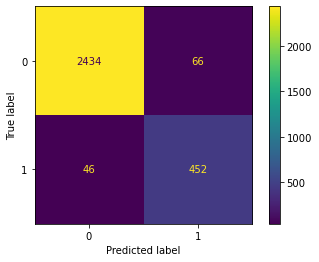

In [85]:
# Plotting confusion matrix of test results

y_preds = rf2.best_estimator_.predict(X_test)

cm = confusion_matrix(y_test, y_preds, labels=rf2.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf2.classes_)

disp.plot(values_format='')

### Analysis of confusion matrix

While our model is strong, it occasionally identifies more false positives than false negatives i.e model predicts employees as 'at risk of leaving' when they might not be. This is a common trade-off. For exploration, we can look into the decision tree's splits and focus on the key features that influence our predictions in the Random Forest model.

### Decision Tree Splits 

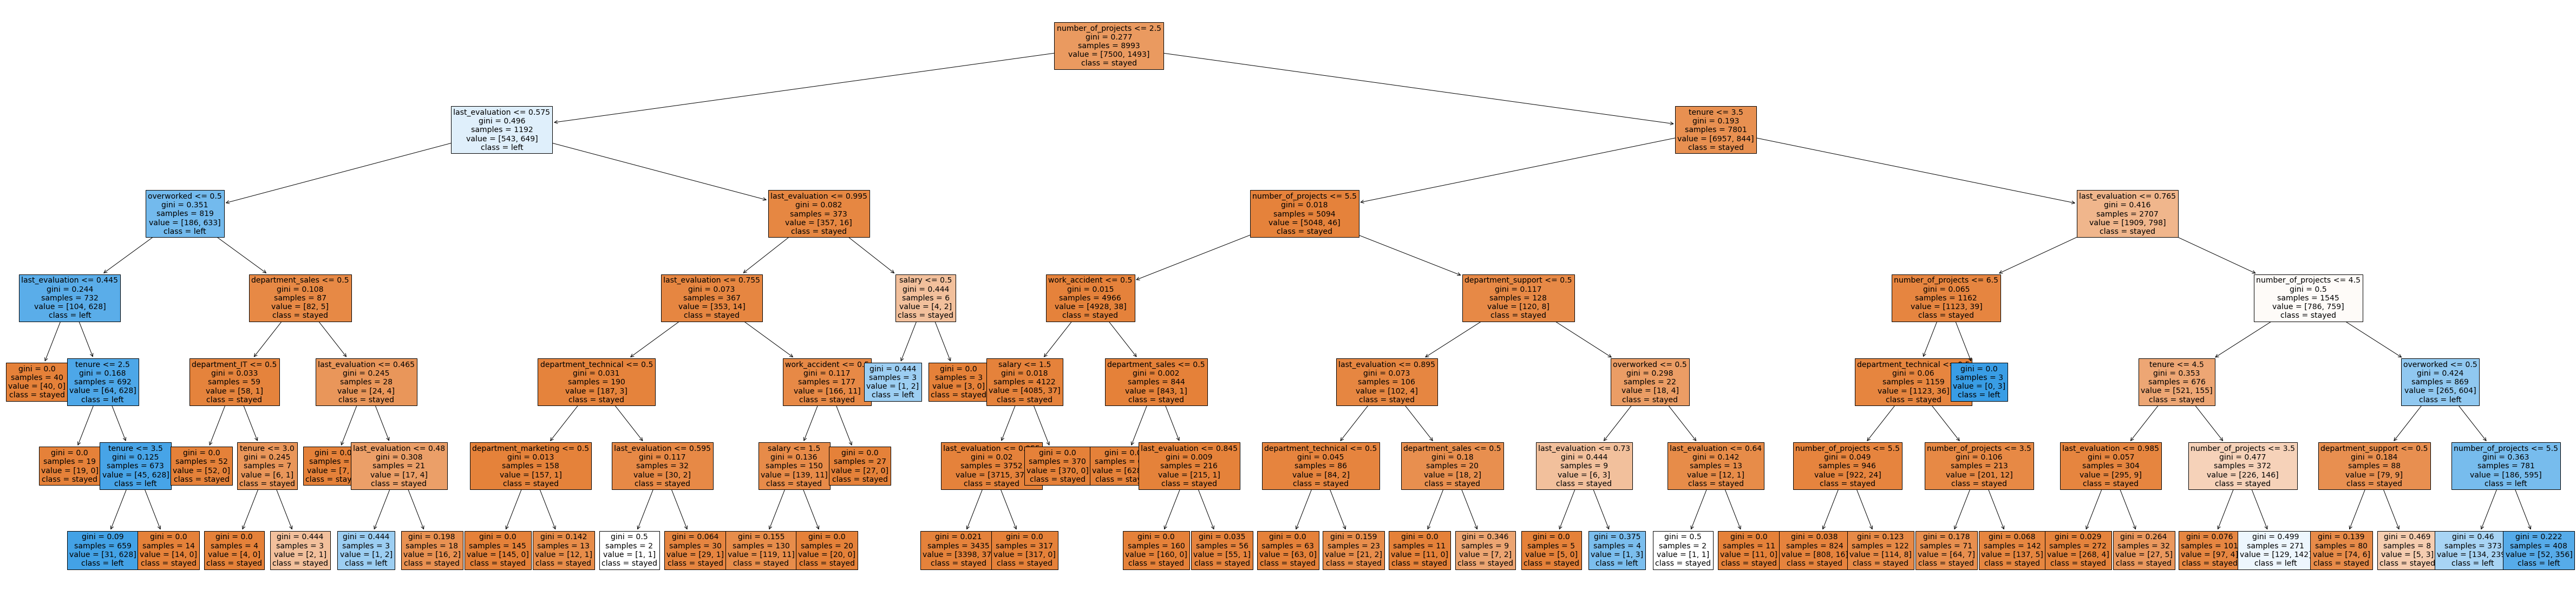

In [86]:
# Plotting Decision tree

plt.figure(figsize=(85,20))
plot_tree(tree2.best_estimator_, max_depth=6, fontsize=14, feature_names=X.columns, 
          class_names={0:'stayed', 1:'left'}, filled=True);
plt.show()

#### Decision tree feature importance 

In [87]:
tree2_importances = pd.DataFrame(tree2.best_estimator_.feature_importances_, 
                                 columns=['gini_importance'], 
                                 index=X.columns
                                )
tree2_importances = tree2_importances.sort_values(by='gini_importance', ascending=False)

# Extracting the features with importances > 0
tree2_importances = tree2_importances[tree2_importances['gini_importance'] != 0]
tree2_importances

,gini_importance
last_evaluation,0.343958
number_of_projects,0.343385
tenure,0.215681
overworked,0.093498
department_support,0.001142
salary,0.000910
department_sales,0.000607
department_technical,0.000418
work_accident,0.000183
department_IT,0.000139


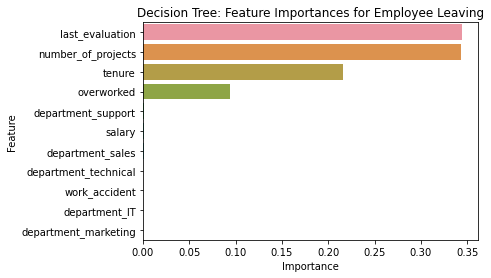

In [92]:
# Plotting decision tree feature importances

sns.barplot(data=tree2_importances, x="gini_importance", y=tree2_importances.index, orient='h')
plt.title("Decision Tree: Feature Importances for Employee Leaving", fontsize=12)
plt.ylabel("Feature")
plt.xlabel("Importance")
plt.show()

### Analysis of observed feature importance 

The barplot above provides insights into the importance of different features within our decision tree model. It reveals that `last_evaluation`, `number_of_projects`,`tenure` and `overworked` are the most influential variables, ranked in that order. These features play a pivotal role in predicting the outcome variable, `left`.

To gain a deeper understanding of why these variables are crucial, we plot feature importances and inspect decision tree splits. By doing so, we can observe how these features are used at various decision points within the tree. This exploration helps us confirm that these attributes indeed hold significant relevance in predicting whether an employee will leave the company.

### Random Forest model feature importances

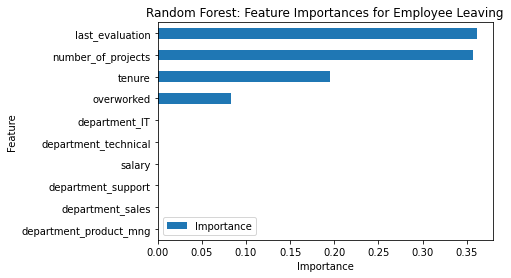

In [89]:
# Feature importances
feat_impt = rf2.best_estimator_.feature_importances_

# Indices of top 10 features
ind = np.argpartition(rf2.best_estimator_.feature_importances_, -10)[-10:]

# Column labels of top 10 features 
feat = X.columns[ind]

# Filter `feat_impt` to consist of top 10 feature importances
feat_impt = feat_impt[ind]

y_df = pd.DataFrame({"Feature":feat,"Importance":feat_impt})
y_sort_df = y_df.sort_values("Importance")
fig = plt.figure()
ax1 = fig.add_subplot(111)

y_sort_df.plot(kind='barh',ax=ax1,x="Feature",y="Importance")

ax1.set_title("Random Forest: Feature Importances for Employee Leaving", fontsize=12)
ax1.set_ylabel("Feature")
ax1.set_xlabel("Importance")

plt.show()

The plot above illustrates that within our Random Forest model, the variables `last_evaluation`, `number_project`, `tenure`, and `overworked` hold the highest levels of importance, ranked in that sequence. These specific attributes are instrumental in predicting the outcome variable, `left`. What's interesting is that these key variables align with those identified by the Decision Tree model, emphasizing their consistent significance in predicting employee attrition.

# PACE: Execute Stage

### Summary of model results

In our model evaluation, we observed notable results:

**Logistic Regression:** On the test set, the logistic regression model delivered respectable performance with weighted average precision, recall, f1-score, and accuracy, all hovering around 80% to 83%. However, it's important to note that while the weighted average scores were relatively strong, they mask the fact that the model's performance in predicting employees who left was not as impressive.

**Tree-based Machine Learning:** After implementing feature engineering, our decision tree model exhibited promising results, with an impressive AUC score of 95.87%. It achieved precision, recall, and f1-score at 85.66%, 90.4%, and 87.88%, respectively. However, it was the Random Forest model that truly shone, slightly outperforming the decision tree model.

Our Random Forest model, designed for predictive accuracy, achieved an impressive accuracy of 96.2% on the test set. This remarkable performance is further emphasized by its strong AUC score of 94%, underscoring its effectiveness in identifying employees at risk of attrition. These results mark a significant milestone in our predictive analysis.

## Conclusion and Recommendations

Our analysis, backed by the models and feature importance insights, highlights a pressing issue within the organization - employee overwork. To foster employee retention and well-being, we recommend the following steps:

1. **Project Limitations**: Consider implementing a cap on the number of projects an employee can simultaneously work on. This measure can alleviate excessive workload.

2. **Employee Tenure**: Pay close attention to employees with four or more years of tenure. Investigate and address potential dissatisfaction factors to improve their experience.

3. **Work-Life Balance**: Evaluate the possibility of rewarding employees for extended hours or revising workload expectations to mitigate the need for excessive overtime.

4. **Effective Communication**: Ensure that employees are well-informed about company policies, especially regarding overtime pay, workload, and time-off expectations. Clarity can reduce uncertainty and stress.

5. **Cultural Assessment**: Conduct company-wide and team-specific discussions to understand and improve the overall work culture and workload management.

6. **Performance Scaling**: Consider implementing a proportionate scale for evaluating and rewarding employees who consistently contribute more effort.

### **Next Steps**

To address potential data leakage concerns, we can explore how predictions change when excluding `last_evaluation` from the data. Additionally, we could consider whether evaluations and satisfaction scores impact employee retention. 

**Exploring clustering techniques like K-means** on this data to could help us gain further insights into employee behavior and preferences.
